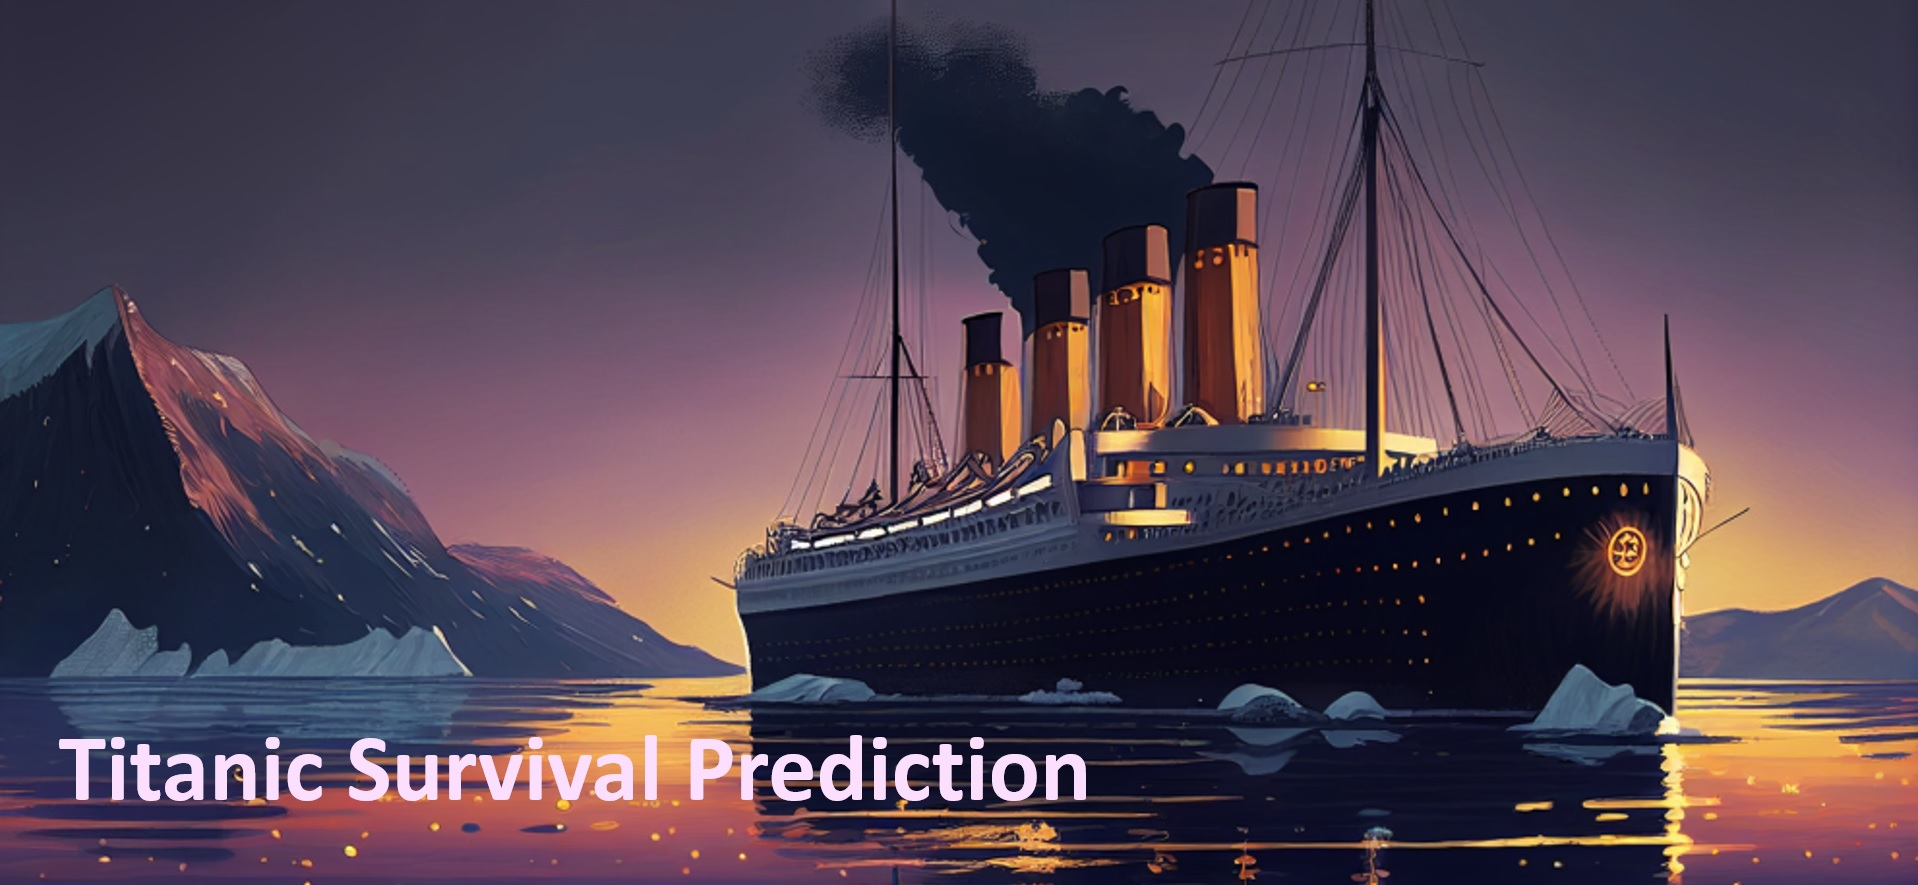

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

<h2 align="left"><font color='purple'>Problem:</font></h2>

This project is about the __Titanic disaster__ of 1912. The goal of this project is to predict which passengers survived the disaster based on a set of features such as age, sex, fare, and cabin class. We are going to create a __XGBoost__ machine learning model that can accurately predict the survival outcome for each passenger.

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

<h2 align="left"><font color='purple'>Dataset:</font></h2>
    
Dataset columns are as follows:

- **Survival** - Survival (0 = No, 1 = Yes)
- **Pclass** - Ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd)
- **Sex** -	Sex	
- **Age** -	Age in years	
- **Sibsp** - Number of siblings or spouses aboard the Titanic	
- **Parch**	- Number of parents or children aboard the Titanic	
- **Ticket** - Ticket number	
- **Fare** - Passenger fare	
- **Cabin** - Cabin number	
- **Embarked** - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:120%; text-align:left">
<a id="contents_tabel"></a>
<h2 align="left"><font color='purple'>Table of Contents:</font></h2>

* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Datasets](#read)
* [Step 3 | Dataset Overview](#overview)
    - [Step 3.1 | Training Dataset Basic Information](#training_basic)
    - [Step 3.2 | Training Dataset Numerical Columns Description](#training_num)
    - [Step 3.3 | Training Dataset Object Columns Description](#training_obj)
* [Step 4 | Univariate Analysis](#univariate)
    - [Step 4.1 | Categorical Variables Univariate Analysis](#cat_univariate)
    - [Step 4.2 | Numerical Variables Univariate Analysis](#num_univariate)
* [Step 5 | Missing Value Treatment](#missing_value)
* [Step 6 | Feature Extraction](#feature_extraction)
* [Step 7 | Feature Subset Selection](#feature_subset_selection)
    - [Step 7.1 | Drop PassengerId](#drop_PassengerId)
    - [Step 7.2 | Drop Ticket](#drop_Ticket)
* [Step 8 | Bivariate Analysis](#bivariate)
    - [Step 8.1 | Categorical Features vs Target](#cat_bivariate)
    - [Step 8.2 | Numerical Features vs Target](#num_bivariate)
* [Step 9 | Categorical Features Encoding](#encoding)
* [Step 10 | Correlation Analysis](#correlation)
* [Step 11 | Train Test Split](#split)
* [Step 12 | XGBoost Model Building](#xgboost)
* [Step 13 | XGBoost Hyperparameter Tuning](#hyperparameter)
* [Step 14 | XGBoost Model Evaluation](#xgb_evaluation)
* [Step 15 | Competition Submission](#submission)

<h2 align="left"><font color='purple'>Let's get started:</font></h2>

<a id="import"></a>
# <p style="background-color:purple; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 1 | Import Libraries</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.base import clone 
%matplotlib inline

In [2]:
# In order to display Plotly plots in a Jupyter Notebook
import plotly.io as pio 
pio.renderers.default = 'notebook'

<a id="read"></a>
# <p style="background-color:purple; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 2 | Read Datasets</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [3]:
# Read training dataset to be used to build our machine learning models
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')

# Read test dataset to be used to see how well our model performs on unseen data
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

<a id="overview"></a>
# <p style="background-color:purple; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 3 | Dataset Overview</p>

⬆️ [Tabel of Contents](#contents_tabel)

__Training Dataset Overview:__

In [4]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

<a id="training_basic"></a>
# <b><span style='color:darkorange'>Step 3.1 |</span><span style='color:purple'> Training Dataset Basic Information</span></b>

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<a id="training_num"></a>
# <b><span style='color:darkorange'>Step 3.2 |</span><span style='color:purple'> Training Dataset Numerical Columns Description</span></b>

In [6]:
df_train.describe(include='number')

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

<a id="training_obj"></a>
# <b><span style='color:darkorange'>Step 3.3 |</span><span style='color:purple'> Training Dataset Object Columns Description</span></b>

In [7]:
df_train.describe(include='object')

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

<h3 align="left"><font color='purple'>Conclusion:</font></h3>

* The __Training__ dataset has information about __891 passengers__ of the Titanic disaster.
* We have __12 variables__ including __11 independent variables__ and __1 dependent variable__ which is `Survived`.
* The dataset contains __missing values__.
* We have __8 categorical variables__: `Survived` , `PassengerId`, `Pclass`, `Name`, `Sex`, `Ticket`, `Cabin`, `Embarked`
* We have __4 numeric variables__: `Age`, `SibSp`, `Parch`, `Fare`

<a id="univariate"></a>
# <p style="background-color:purple; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 4 | Univariate Analysis</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
    
To examine the dataset more precisely, we perform univariate analysis for continuous and categorical features separately:

<a id="cat_univariate"></a>
# <b><span style='color:darkorange'>Step 4.1 |</span><span style='color:purple'> Categorical Variables Univariate Analysis</span></b>

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
    
To examine the distribution of categorical features, we plot interactive pie charts:

In [8]:
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Embarked']

In [9]:
# Create the subplots
fig = make_subplots(rows=1, cols=4, specs=[[{'type':'domain'}]*4], vertical_spacing=0.01, horizontal_spacing=0.01)

# Loop through all the features and add the pie chart to the subplot
for i, feature in enumerate(categorical_columns):
    value_counts = df_train[feature].value_counts()
    labels = value_counts.index.tolist()
    values = value_counts.values.tolist()

    # Define color map based on purple color
    cmap = colors.LinearSegmentedColormap.from_list("Purple", ["Purple", "white"])
    norm = colors.Normalize(vmin=0, vmax=len(labels))
    color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(labels))]

    # Create the pie chart
    pie_chart = go.Pie(
        labels=labels,
        values=values,
        hole=0.6,
        marker=dict(colors=color_list, line=dict(color='white', width=3)),
        textposition='inside',
        textinfo='percent+label',
        title=feature,  # Add title with the feature name
        title_font=dict(size=25, color='black', family='Calibri')
    )

    # Add the pie chart to the subplot
    fig.add_trace(pie_chart, row=1, col=i+1)

# Update the layout
fig.update_layout(showlegend=False, height=400, width=990, 
                   title={
                          'text':"Distribution of Categorical Variables in Training Data",
                          'y':0.90,
                          'x':0.5,
                          'xanchor':'center',
                          'yanchor':'top',
                          'font': {'size':28, 'color':'black', 'family':'Calibri'}
                         })

# Show the plot
fig.show()

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

<h3 align="left"><font color='purple'>Conclusion:</font></h3>

* Almost __34% of the passengers__ in the training dataset __survived__, which indicates that the __dataset is not completely balanced__.
* Almost __24% of passengers__ bought __1st__ class tickets, __21%__ bought __2nd class__ tickets and __55%__ bought __3d class__ tickets. 
* __35%__ of the passengers in the training dataset were __women__ and the rest were __men__.       
* Almost __72%__ of passengers embarked from __Southampton port__, __19%__ from __Cherbourg port__ and __9%__ of passengers embarked from __Queenstown port__.

____
<a id="num_univariate"></a>
# <b><span style='color:darkorange'>Step 4.2 |</span><span style='color:purple'> Numerical Variables Univariate Analysis</span></b>

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
    
To examine the distribution of numerical features, we plot histograms:

In [10]:
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']

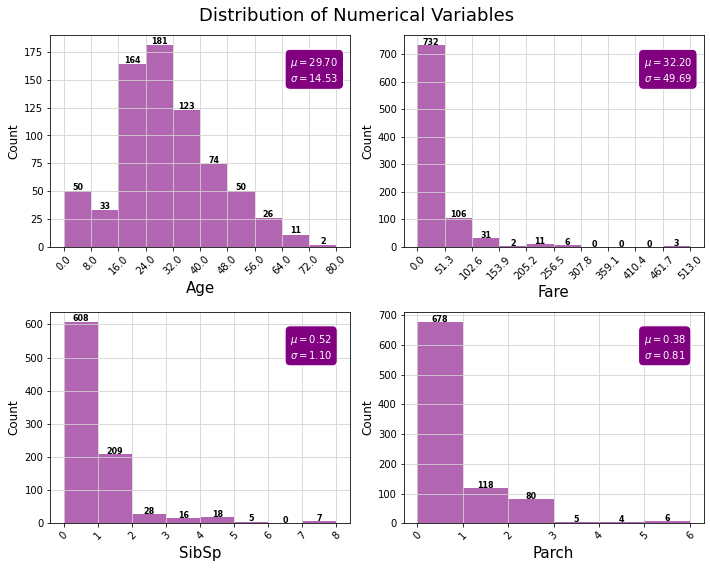

In [11]:
# Create figure
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

for i, col in enumerate(numerical_columns):
    x=i//2; y=i%2
    
    # Determine number of bins for each feature
    if i<2:
        _ , bin_edges = np.histogram(df_train[col], range=(np.floor(df_train[col].min()), np.ceil(df_train[col].max())))
    else:
        bin_edges = range(df_train[col].min(), df_train[col].max()+1)
        
    # Plot histograms                                        
    graph = sns.histplot(data=df_train, x=col, bins=bin_edges, ax=ax[x,y], edgecolor='none', color='Purple', alpha=0.6)
    ax[x,y].set_xlabel(col, fontsize=15)
    ax[x,y].set_ylabel('Count', fontsize=12)
    ax[x,y].set_xticks(np.round(bin_edges,1))
    ax[x,y].set_xticklabels(ax[x,y].get_xticks(), rotation = 45)
    ax[x,y].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
        ax[x,y].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=8 ,fontweight="bold")
    textstr = '\n'.join((
    r'$\mu=%.2f$' %df_train[col].mean(),
    r'$\sigma=%.2f$' %df_train[col].std()
    ))
    ax[x,y].text(0.8, 0.9, textstr, transform=ax[x,y].transAxes, fontsize=10, verticalalignment='top',
                color='white', bbox=dict(boxstyle='round',facecolor='Purple', edgecolor='white', pad=0.5))
    
plt.suptitle('Distribution of Numerical Variables', fontsize=18) 
plt.tight_layout() 
plt.show()

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

<h3 align="left"><font color='purple'>Conclusion:</font></h3>

* The average __age__ of the passengers was about __30 years old__, and according to the positive skewness of the histogram, they were generally young.
* Most passengers have bought cheap tickets. 
* About __90%__ of passengers either did not have a family member with them or had __at most 1 family member__ with them.    

<a id="missing_value"></a>
# <p style="background-color:purple; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 5 | Missing Value Treatment</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
Next, we define a function to visualize the percentage of missing values in each feature of a DataFrame in the form of a barplot. In this way, depending on the percentage of missing values in each feature, we can decide how to deal with missing values:

In [12]:
def missing_percent_plot(df, data_string):
    '''
    This function visualizes the percentage of missing data in each feature of a DataFrame
    '''
    # Calculate the percentage of missing value in each feature
    nan_percent= 100*(df.isnull().sum()/len(df))
    
    # Filtering features with missing value
    nan_percent= nan_percent[nan_percent>0].sort_values()
    nan_percent = round(nan_percent,1)
    
    # Plot the barh chart
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.barh(nan_percent.index, nan_percent.values, color='purple', height=0.65)

    # Annotate the values and indexes
    for i, (value, name) in enumerate(zip(nan_percent.values, nan_percent.index)):
        ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold', color='purple', fontsize=12)
    
    # Set x-axis limit
    ax.set_xlim([0,110])

    # Add title and xlabel
    plt.title("Percentage of Missing Data in " + data_string, fontsize=14)
    plt.xlabel('Percentages (%)', fontsize=12)
    plt.show()

We call ‍‍the __missing_percent_plot__ function on the training data:

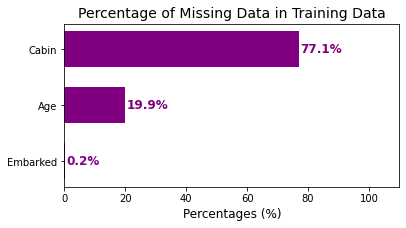

In [13]:
missing_percent_plot(df_train, 'Training Data')

And now, we call the above function again on test data:

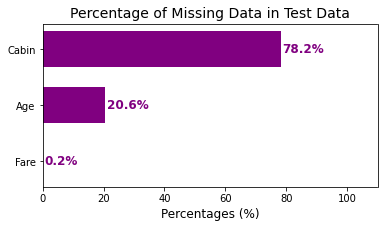

In [14]:
missing_percent_plot(df_test, 'Test Data')

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

<h3 align="left"><font color='purple'>Conclusion:</font></h3>

* Since most of the ‍‍`Cabin` data is missing in both training and test datasets, this feature will not bring much information to the model and its imputation will bring a lot of noise. Therefore, we __remove `Cabin` from both datasets__.
* We fill in `Age`, `Embarked` and `Fare` missing values using different __imputation methods__.  

<a id="num_univariate"></a>
# <b><span style='color:darkorange'>Step 5.1 |</span><span style='color:purple'> Drop Cabin</span></b>

In [15]:
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

<a id="num_univariate"></a>
# <b><span style='color:darkorange'>Step 5.2 |</span><span style='color:purple'> Age Imputation</span></b>

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
    
Next, we try to find a categorical feature with which the `Age` feature has the most relationship. In this way, we can categorize the dataset samples according to the categories of that categorical feature and fill the missing values in Age using the mean or median value of other values in the same category. In this way, we have been able to have a more accurate estimate for the missing values in Age. Let's plot boxplots of Age versus the dataset categorical features.  We want to see that Age has different data distribution according to the categories of which of the features, so that we can use them to impute the missing data in Age:

In [16]:
categorical_features = ['Pclass', 'Sex', 'Embarked']

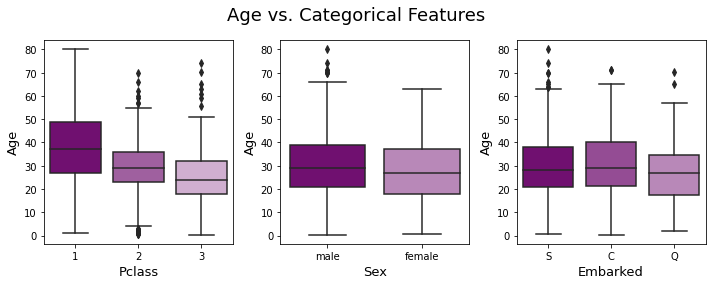

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(10,4))

for i, feature in enumerate(categorical_features):
    
    # Create a custom color palette 
    purple_cmap = colors.LinearSegmentedColormap.from_list("Purple", ["Purple", "white"])
    labels = df_train[feature].unique()
    norm = colors.Normalize(vmin=0, vmax=len(labels))
    color_list = [colors.rgb2hex(purple_cmap(norm(i))) for i in range(len(labels))]
    custom_palette = sns.color_palette(color_list)

    # Plot Boxplot
    sns.boxplot(y='Age', x=feature, data=df_train, ax=ax[i], palette=custom_palette)
    
    # Set Axis Labels
    ax[i].xaxis.label.set_size(13)
    ax[i].yaxis.label.set_size(13)
    
plt.suptitle('Age vs. Categorical Features', fontsize=18)
plt.tight_layout()    
plt.show()

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
    
As can be seen, `Age` has a different median value according to different categories of `Pcalss`. It seems that missing values in `Age` can be filled with the median value of samples with the same `Pclass` category. To be sure, we also check the correlation of features with `Age`:

In [18]:
age_correlations = df_train.corr()['Age'].drop('Age').sort_values()
age_correlations = pd.DataFrame(age_correlations.values, index=age_correlations.keys(), columns=['Correlation'])
age_correlations.style.background_gradient(cmap=cmap)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

As can be seen, `Pclass` has the highest absolute value of correlation with `Age`. Therefore, we ensured that we could impute missing values in `Age` to the median value of `Age` values with the same `Pclass` category.

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

Create a dictionary with Pclass values as __keys__ and corresponding median Age values __in df_train__ as __values__:

In [19]:
pclass_median_age = df_train.groupby("Pclass")["Age"].median().to_dict()
pclass_median_age

{1: 37.0, 2: 29.0, 3: 24.0}

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
    
Define a function __to fill in missing Age values in a dataframe__ based on the __pclass_median_age dictionary__:

In [20]:
def fill_age_by_pclass(df, pclass_median_age):
    '''
    This function fills in missing values of a column of a dataframe based on a dictionary 
    '''
    # Loop over each row in the dataframe
    for i, row in df.iterrows():
        # If Age value is missing, replace it with the corresponding median value from pclass_median_age dictionary
        if pd.isnull(row["Age"]):
            df.loc[i, "Age"] = pclass_median_age[row["Pclass"]]
    return df

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
    
Fill in missing `Age` values in __df_train__ and __df_test__ using __fill_age_by_pclass function__ and __pclass_median_age dictionary__ which is obtained just based on training dataset to avoid __data leakage__:

In [21]:
df_train = fill_age_by_pclass(df_train, pclass_median_age)
df_test = fill_age_by_pclass(df_test, pclass_median_age)

<a id="num_univariate"></a>
# <b><span style='color:darkorange'>Step 5.3 |</span><span style='color:purple'> Embarked & Fare Imputation</span></b>

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

Since the portion of missing values in `Embarked` and `Fare` is very small compared to the total number of samples in both training and test datasets (__approximately 0.2%__), these missing values in the `Embarked` feature of __df_train__ will be filled with the __Mode value__ of this feature and in the `Fare` feature of __df_test__, we fill the missing values with the __Median__ value of this feature in training data:

In [22]:
# Embarked imputation of df_train
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0] ,inplace=True)

# Fare imputation of df_test
df_test['Fare'].fillna(df_train['Fare'].median() ,inplace=True)

Let us make sure that there is no other missing data in any of the training and test dataframes:

In [23]:
print('Number of missing values in df_train: {}'.format(df_train.isnull().sum().sum()))
print('Number of missing values in df_test: {}'.format(df_test.isnull().sum().sum()))

Number of missing values in df_train: 0
Number of missing values in df_test: 0


In [24]:
df_train['Ticket'].nunique()

681

<a id="feature_extraction"></a>
# <p style="background-color:purple; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 6 | Feature Extraction</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

__Feature extraction__ is the process of selecting and transforming raw data into a set of features that are suitable for machine learning models to consume.

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

`Name` feature contains different titles. Next, we extract these titles using __RegEx__ and then check whether there is a correlation between these titles and survival. If there is correlation, we add these titles as new features to both datasets.

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

Looking at the `Name` feature, we notice that each title is preceded by a space and ends with a dot:

In [25]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

According to the existing pattern, we define a __function__ in which titles are extracted from names of passengers using __RegEx__:

In [26]:
def title_extractor(name_series):
    '''
    This function extracts titles from a Series containing names of people
    '''
    return name_series.str.extract(' ([A-Za-z]+)\.', expand=False)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

Extract titles from training dataset using __title_extractor__ function:

In [27]:
df_train['Title'] = title_extractor(df_train['Name'])
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
    
Extract titles from test dataset using __title_extractor__ function:

In [28]:
df_test['Title'] = title_extractor(df_test['Name'])
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
  
As can be seen in both Training and Test datasets, there are __4 main titles__ including `Mr`, `Miss`, `Mrs` and `Master`. We place the rest of the titles in a category called `other` due to their low frequency:

In [29]:
train_other_idx = df_train[~df_train.Title.isin(['Mr','Miss','Mrs','Master'])].index
df_train.loc[train_other_idx,'Title'] = 'other'

In [30]:
test_other_idx = df_test[~df_test.Title.isin(['Mr','Miss','Mrs','Master'])].index
df_test.loc[test_other_idx,'Title'] = 'other'

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

Next, we check the survival percentage based on the category of `Title` feature in the training dataset:

In [31]:
df_train[['Title','Survived']].groupby('Title', as_index=False).mean().sort_values(by='Survived').style.background_gradient(cmap=cmap)
                              

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

As can be seen, the survival percentage was different in passengers with different titles. Therefore, the `Title` feature is related to survival, and we keep it as a new feature in both datasets and drop `Name` feature from both datasets:

In [32]:
df_train.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

<a id="feature_subset_selection"></a>
# <p style="background-color:purple; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 7 | Feature Subset Selection</p>

⬆️ [Tabel of Contents](#contents_tabel)

<a id="drop_PassengerId"></a>
# <b><span style='color:darkorange'>Step 7.1 |</span><span style='color:purple'> Drop PassengerId</span></b>

In [33]:
print('The number of samples in the training dataset: {}'.format(len(df_train)))
print('The number of unique values in PassengerId: {}'.format(df_train['PassengerId'].nunique()))

The number of samples in the training dataset: 891
The number of unique values in PassengerId: 891


<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

As can be seen, values of `PassengerId` are all unique and therefore this feature acts as an identifier and lacks valuable information for the model. So we drop it from both datasets:

In [34]:
df_train.drop('PassengerId', axis=1, inplace=True)
df_test.drop('PassengerId', axis=1, inplace=True)

<a id="drop_Ticket"></a>
# <b><span style='color:darkorange'>Step 7.2 |</span><span style='color:purple'> Drop Ticket</span></b>

In [35]:
print('The number of unique values in Ticket: {}'.format(df_train['Ticket'].nunique()))

The number of unique values in Ticket: 681


<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
    
As can be seen, `Ticket` has 681 unique values and this number of unique values is very high compared to the number of data samples. Even by separating the primary characters of passenger tickets code and creating a new feature, we will face a large number of unique values again. Therefore, this feature cannot provide much information for our model, and for this reason, we drop it from both datasets:

In [36]:
df_train.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

<a id="bivariate"></a>
# <p style="background-color:purple; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 8 | Bivariate Analysis</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
    
In Step 4, we looked at each feature in our dataset separately. In this step, we will analyze the relationship between each feature in our dataset and our target variable. We will start with categorical features, and then move on to numerical features. By doing this, we can understand how each feature is related to our target variable and use this information to build a predictive model.

<a id="cat_bivariate"></a>
# <b><span style='color:darkorange'>Step 8.1 |</span><span style='color:purple'> Categorical Features vs Target</span></b>

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:100%; text-align:left">

We will create __100% stacked bar charts__ showing the proportion of `Survived` for each category of categorical features seprately:

In [37]:
# Define a list containing the names of categorical features in our dataset
Cat_Features = ['Pclass','Sex','Embarked','Title']

# Define the target name as a variable for simplicity
Target = 'Survived'

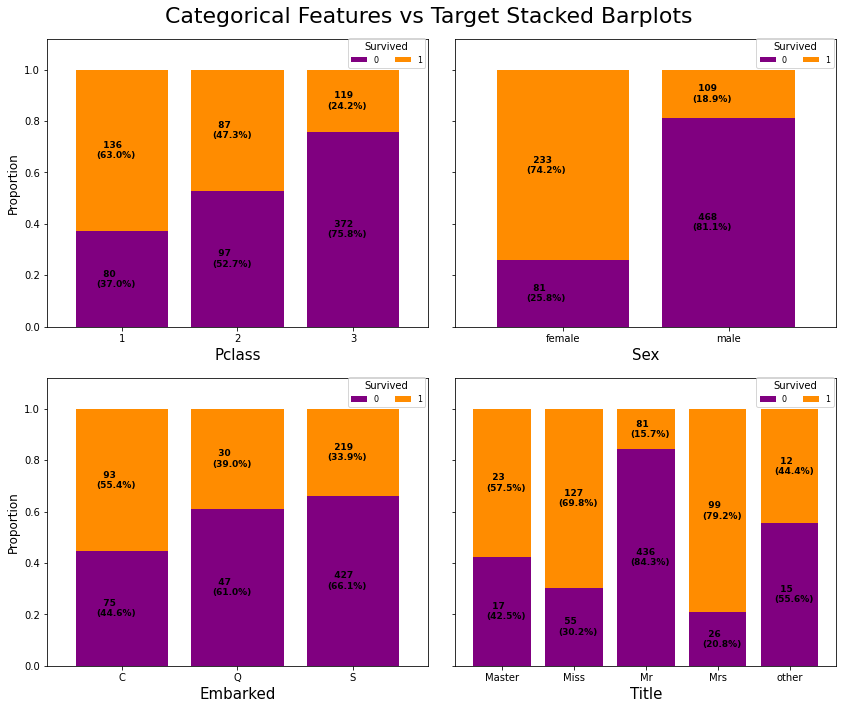

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

for i,col in enumerate(Cat_Features):
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df_train[col], columns=df_train[Target])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df_train[col], columns=df_train[Target], normalize='index')

    # Define colormap
    cmp = ListedColormap(['purple', 'darkorange'])
    
    # Plot stacked bar charts
    x, y = i//2, i%2
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.22, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'  {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='Survived', loc=(0.79,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
    # Increase xlabel & ylabel font sizes
    ax[x,y].set_ylabel('Proportion', fontsize=12)
    ax[x,y].set_xlabel(col, fontsize=15) 
            

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

<h3 align="left"><font color='purple'>Conclusion:</font></h3>

* Almost all 4 categorical features have a good effect on the target variable because by changing the category in these features, the percentage of samples belonging to each class of the target has changed significantly.

____
<a id="num_bivariate"></a>
# <b><span style='color:darkorange'>Step 8.2 |</span><span style='color:purple'> Numerical Features vs Target</span></b>

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:100%; text-align:left">

In this section, we try to find the mean and distribution of numerical features for passengers who survived and did not survive the Titanic disaster:

In [39]:
# Define a list containing the names of important numerical features in the dataset 
Num_Features = ['Age','Fare','SibSp','Parch']

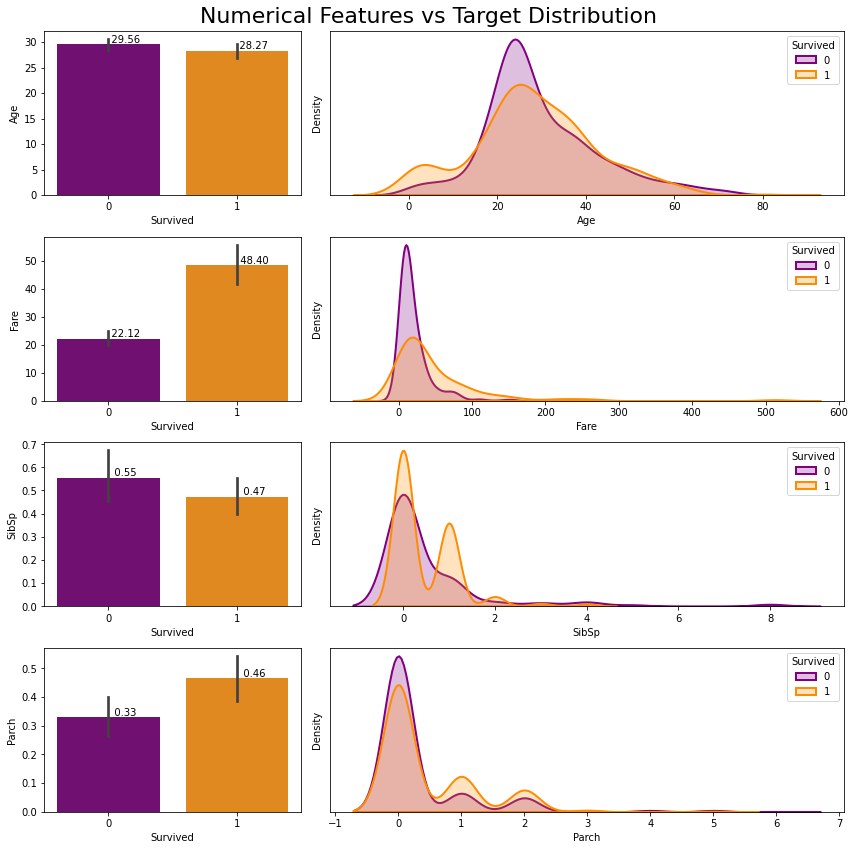

In [40]:
sns.set_palette(['purple', 'darkorange'])

fig, ax = plt.subplots(4, 2, figsize=(12,12), gridspec_kw={'width_ratios': [1, 2]})

for i,col in enumerate(Num_Features):
    # barplot
    graph = sns.barplot(data=df_train, x=Target, y=col, ax=ax[i,0])
    # kde Plot
    sns.kdeplot(data=df_train[df_train[Target]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df_train[df_train[Target]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Survived', loc='upper right')
    # Add bar sizes to our plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='           %.2f')
        
plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

<h3 align="left"><font color='purple'>Conclusion:</font></h3>

* Among all of the numerical features seen in the above diagram, first the `Fare` feature and then the `Age` feature have the greatest impact on the target because the distribution and the average values of data belonging to each class of the target in these 2 features have changed significantly!

<a id="encoding"></a>
# <p style="background-color:purple; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 9 | Categorical Features Encoding</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

Among all the categorical features, `Sex` & `Embarked` & `Title` are __nominal__ and __Dummy Encoding__ is applied to them. `Pclass` feature is an __ordinal__ categorical feature that has been applied with __Integer Encoding__ and does not need to be encoded again:

In [41]:
# Apply dummy encoding on training dataset
df_train = pd.get_dummies(df_train, columns=['Sex','Embarked','Title'])
df_train.drop(['Embarked_Q', 'Sex_female', 'Title_other'], axis=1, inplace=True)

# Apply dummy encoding on test dataset
df_test = pd.get_dummies(df_test, columns=['Sex','Embarked','Title'])
df_test.drop(['Embarked_Q', 'Sex_female', 'Title_other'], axis=1, inplace=True)

<a id="correlation"></a>
# <p style="background-color:purple; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 10 | Correlation Analysis</p>

⬆️ [Tabel of Contents](#contents_tabel)

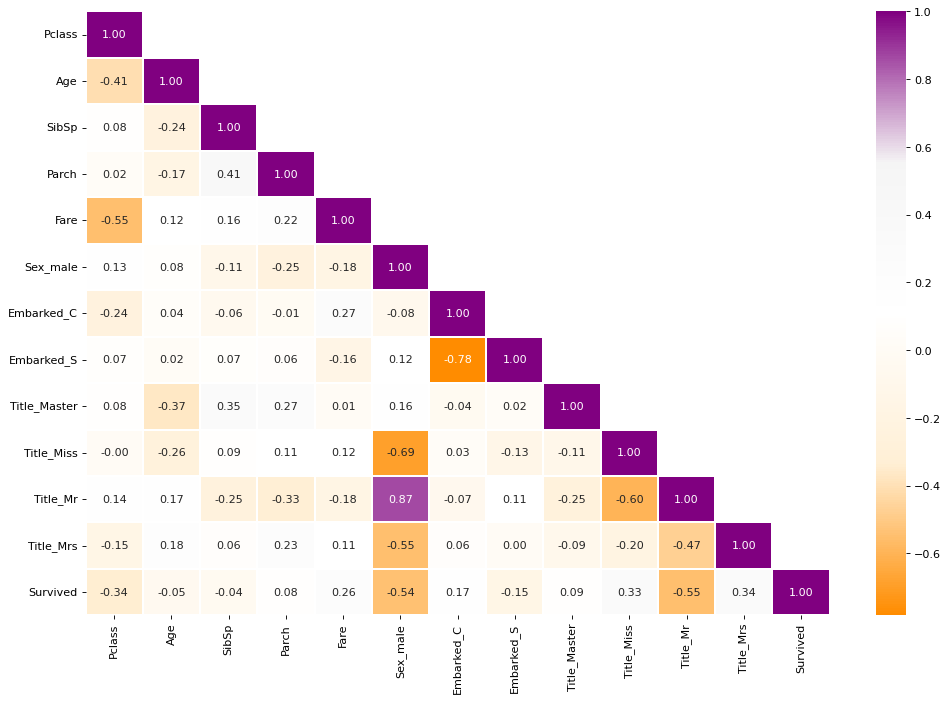

In [42]:
# Define a customized colormap

## Define the number of colors in the colormap
num_colors = 256
## Create a list of colors with the two defined colors as the endpoints
colors = ['darkorange', '#FFEFD5', 'white', '#F5F5F5',  'purple']
## Create a custom colormap with the defined colors
my_cmap = LinearSegmentedColormap.from_list('my_colormap', colors, num_colors)

# Calculation of the Spearman correlation
target = 'Survived'
df_train_ordered = pd.concat([df_train.drop(target,axis=1), df_train[target]],axis=1)
corr = df_train_ordered.corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(15,10), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=my_cmap, fmt='.2f', linewidths=0.2)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

<h3 align="left"><font color='purple'>Conclusion:</font></h3>

* Target has the highest correlation first with `Sex` and then with `Pclass`.

<a id="split"></a>
# <p style="background-color:purple; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 11 | Train Test Split</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

First of all, it is necessary to define the __features (X)__ and the __output labels (y)__ of the given dataset. X is a dataframe containing the different feature values for all given observations, while y is a series containing the categorical labels belonging to each observation:

In [43]:
X = df_train.drop('Survived', axis=1)
y = df_train['Survived'] 

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
    
We need to perform __train test split__ in supervised machine learning to evaluate the performance of a model after it has been trained. The data set is typically divided into two parts; the training set which is used to train the model, and the test set which is used to measure how well the model performs on new data.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [45]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (712, 12)
X_test shape:  (179, 12)
y_train shape:  (712,)
y_test shape:  (179,)


<a id="xgboost"></a>
# <p style="background-color:purple; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 12 | XGBoost Model Building</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

__XGBoost (Extreme Gradient Boosting)__ is a popular ensemble method used in machine learning for classification and regression tasks. It constructs __decision trees__ sequentially, using __gradient boosting__ to minimize the loss function by iteratively adding trees. XGBoost can handle large datasets efficiently and includes built-in regularization techniques to prevent overfitting.

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

<h3 align="left"><font color='purple'>Advantages of XGBoost:</font></h3>


* __High Accuracy__: XGBoost has been shown to outperform other popular algorithms in many classification tasks.
    
* __Regularization__: XGBoost includes built-in regularization techniques to prevent overfitting, such as L1 and L2 regularization, which can improve generalization performance.
    
* __Fast Parallel Processing:__ XGBoost implements parallel processing, making it much faster than GBM. It also supports Hadoop implementation.

* __Effective Tree Pruning:__ XGBoost makes splits up to the specified maximum depth and then prunes the tree

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

<h4 align="left"><font color='purple'>Note:</font></h4>

* Since the performance of the XGBoost model depends on the choice of hyperparameters, and the choice of appropriate hyperparameters can significantly improve the accuracy and generalization of the model, first of all, we turn to hyperparameter tuning.

<a id="hyperparameter"></a>
# <p style="background-color:purple; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 13 | XGBoost Hyperparameter Tuning</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
    
__Hyperparameter tuning__ is essential in __XGBoost classifier__ to optimize the performance of the model. XGBoost has several hyperparameters that can be tuned to achieve the best possible performance for a given problem.


<h3 align="left"><font color='purple'>XGBoost Hyperparameters:</font></h3>

* __eta (Learning rate):__ Step size shrinkage used in updates to prevent overfitting.

* __max_depth:__ Maximum tree depth for base learners. Increasing this value will make the model more complex and more likely to overfit.

* __gamma:__ Minimum loss reduction required to make a further partition on a leaf node of the tree.

* __lambda (reg_lambda):__ L2 regularization term on weights. Increasing this value will make the model more conservative.

* __alpha (reg_alpha):__ L1 regularization term on weights. Increasing this value will force more feature selection.

* __subsample:__ Subsample ratio of the training instances. Setting it to a value less than 1 will make the model more random.

* __colsample_bytree:__ Subsample ratio of columns when constructing each tree.

* __colsample_bylevel:__ Subsample ratio of columns for each level.

* __n_estimators:__ Number of trees in the forest.

* __max_leaf_nodes:__ Maximum number of terminal nodes or leaves in a tree.

* __max_delta_step:__ Maximum delta step for each leaf. It's used for further control over the range of values of weight for each instance.

* __scale_pos_weight:__  It is the ratio of number of negative class to the positive class and controls the balance of positive and negative weights, useful for unbalanced classes.

* __min_child_weight:__ Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, the building process will give up further partitioning.

* __booster:__ The underlying model used by XGBoost, either tree-based (gbtree) or linear (gblinear). Tree-based booster always outperforms the linear booster and thus the later is rarely used.

* __Objective:__ Defines the loss function used to evaluate the performance of the model.

* __eval_metric:__ Specifies the metric used to judge the performance of the model during training and testing.

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
    
Building a XGBoostclassifier is easy, but improving the model requires hyperparameter tuning. There are several methods for hyperparameter tuning in XGBoost, such as __grid search__, __random search__, and __Bayesian optimization__. We will define a function that finds the optimal combination of hyperparameters to achieve the best accuracy using __GridSearchCV__ and __Cross-validation__ (StratifiedKFold) :

In [46]:
def tune_hyperparameters(clf, param_grid, X_train, y_train):
    """
    This function tunes the hyperparameters of a classifier using GridSearchCV and cross-validation
    and returns the best classifier model with the optimal hyperparameters.
    """
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

__Hyperparameter Grid__ refers to a pre-defined set of hyperparameters to be tested in a model training process. Each combination of hyperparameters is a single point in the grid, and the goal is to select the best hyperparameters for the model by evaluating model performance on a validation set. The __grid__ defines the search space for hyperparameter optimization algorithms to find the optimal hyperparameters:

In [47]:
# Define the hyperparameter grid to search
xgb_param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.04, 0.05, 0.06],
    'n_estimators': [150, 200, 250],
    'min_child_weight': [2, 3, 4],
    'scale_pos_weight': [0.2, 0.5, 0.8],
    'subsample': [0.8, 0.9, 1],  
    'colsample_bytree': [0.3, 0.5, 0.8],
    'colsample_bylevel': [0.7, 0.8, 0.9], 
    'reg_alpha': [0.01, 0.05, 0.1],  
    'reg_lambda': [0.05, 0.1, 0.2], 
    'max_delta_step': [1, 2, 3],    
    'gamma': [0, 0.1, 0.2]
}

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
    
Let's call __tune_hyperparameters__ function to find the optimal values for XGBoost hyperparameters that best fit our data:

In [48]:
# Initialize the XGBoost Classifier
xgb = XGBClassifier(random_state=0)

# Find the best hyperparameters
## xgb_opt = tune_clf_hyperparameters(xgb, xgb_param_grid, X_train, y_train)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
    
Due to the large number of XGBoost hyperparameters, the process of finding optimal hyperparameters will be very time-consuming. For this reason, we made the set of grid values smaller and finally we got the following optimal combination of hyperparameters for our XGBoost classifier:

In [49]:
# Initialize the XGBoost Classifier using optimal hyperparameters
xgb_opt = XGBClassifier(max_depth=6,
                        learning_rate=0.05,
                        n_estimators=200,  
                        min_child_weight=2,
                        scale_pos_weight=0.5,
                        subsample=0.9 ,
                        colsample_bytree=0.5,
                        colsample_bylevel=0.8 ,
                        reg_alpha=0.05 ,
                        reg_lambda=0.1 ,
                        max_delta_step=2 ,
                        gamma=0.1,
                        random_state=0)

# Train the XGBoost classifier
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=2, max_depth=6, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.05, reg_lambda=0.1, ...)

<a id="xgb_evaluation"></a>
# <p style="background-color:purple; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 14 | XGBoost Model Evaluation</p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
    
To evaluate the performance of our classifier, first we define a function that provides a summary of the model's performance on the test data using the desired metrics:

In [50]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1], average='macro')],
                          index=['Accuracy','Macro Precision','Macro Recall','Macro F1-score','Macro AUC'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

Now we define a function that provides a complete report of the model's performance on the training and test data, plus the confusin_matrix of the model on the test data and the summary of the model performance using the above function:

In [51]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports and confusion matrix
    '''
    # Set font scale
    sns.set(font_scale=1.5)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    print('\n')
    
    # Create figure and subplots 
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=90, figsize=(12, 5))
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=purple_cmap, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
            
    # Report desired results as a summary in the form of a table
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax2.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 3.6)
    table.set_fontsize(12)
    ax2.axis('tight')
    # Hide the axes
    ax2.axis('off')
    # set the title
    ax2.set_title('{} Performance Summary on Test Data'.format(model_name), fontsize=18)
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('purple')
              
    plt.tight_layout()
    plt.show() 

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">
    
Let's evaluate our XGBoost classifier using the above function:


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       439
           1       0.95      0.77      0.85       273

    accuracy                           0.89       712
   macro avg       0.91      0.87      0.88       712
weighted avg       0.90      0.89      0.89       712


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       110
           1       0.92      0.68      0.78        69

    accuracy                           0.85       179
   macro avg       0.87      0.82      0.84       179
weighted avg       0.86      0.85      0.85       179





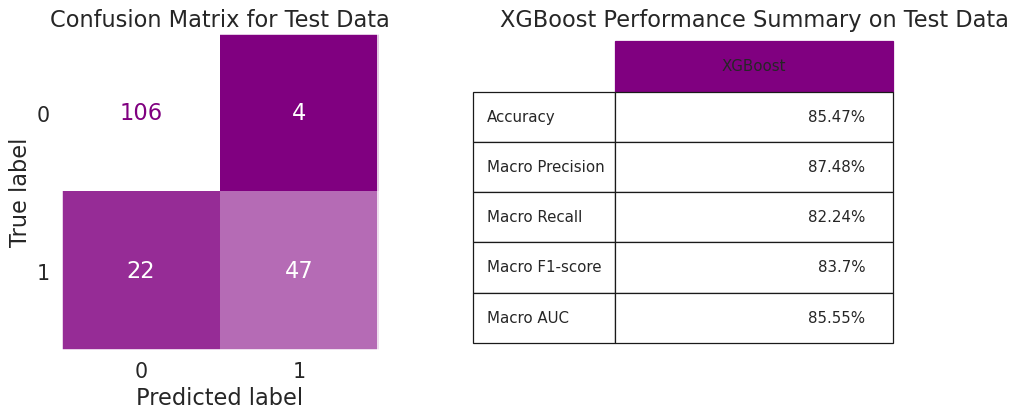

In [52]:
model_evaluation(xgb_opt, X_train, X_test, y_train, y_test, 'XGBoost')

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:120%; text-align:left">

An __accuracy__ of about __85.5%__ was obtained on the __test data__, and there is no significant difference between the accuracy obtained on the training and test data, so the model is not overfit.

<a id="submission"></a>
# <p style="background-color:purple; font-family:calibri; font-size:130%; color:white; text-align:center; border-radius:15px 50px; padding:10px">Step 15 | Competition Submission </p>

⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

After finding the optimal hyperparameters for our XGBoost classifier and evaluating the model, now we train the classifier on the entire train.csv data and finally use it to predict target values for the test.csv samples and then use the predictions made for submission:

In [53]:
# Define features(X) and output labels(y)
X = df_train.drop('Survived', axis=1)
y = df_train['Survived'] 

# Initialize the XGBoost Classifier using optimal hyperparameters
xgb_final = XGBClassifier(max_depth=6,
                          learning_rate=0.05,
                          n_estimators=200,  
                          min_child_weight=2,
                          scale_pos_weight=0.5,
                          subsample=0.9 ,
                          colsample_bytree=0.5,
                          colsample_bylevel=0.8 ,
                          reg_alpha=0.05 ,
                          reg_lambda=0.1 ,
                          max_delta_step=2 ,
                          gamma=0.1,
                          random_state=0)

# Train the model on the whole dataset
xgb_final.fit(X, y)

# Target prediction for test.csv samples using relavant features
y_pred = xgb_final.predict(df_test)

# Generate and save the submission file according to gender_submission.csv
df_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
df_submission['Survived'] = y_pred
df_submission.to_csv('XGBoost_Submission.csv', index=False)

<h2 align="left"><font color='purple'>Best Regards!</font></h2>